# Feature Engineering - Part B

### 5. [Outlier elimination](#outlier)
### 6. [Creating new features](#new_feat)

### Load libraries

In [24]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

# Import math
import math

# Import seaborn
import seaborn as sns

### Load the saved csv file, which is NaN free

In [25]:
# This CSV file does not contain any missing values
loan_data = pd.read_csv('LoanData_NoNan.csv')

# Print the shape of the dataframe
print('Shape of the Data', loan_data.shape)

# Print first 5 rows of clean dataframe
loan_data.head()

Shape of the Data (618, 16)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
0,0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849,Graduate
1,1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583,Graduate
2,2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000,Graduate
3,3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583,Not Graduate
4,4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000,Graduate


## <a id='outlier'>5. Outlier Elimination</a>

![Boxplot](img/normaldist.png)

###  Draw histogram for Numerical features

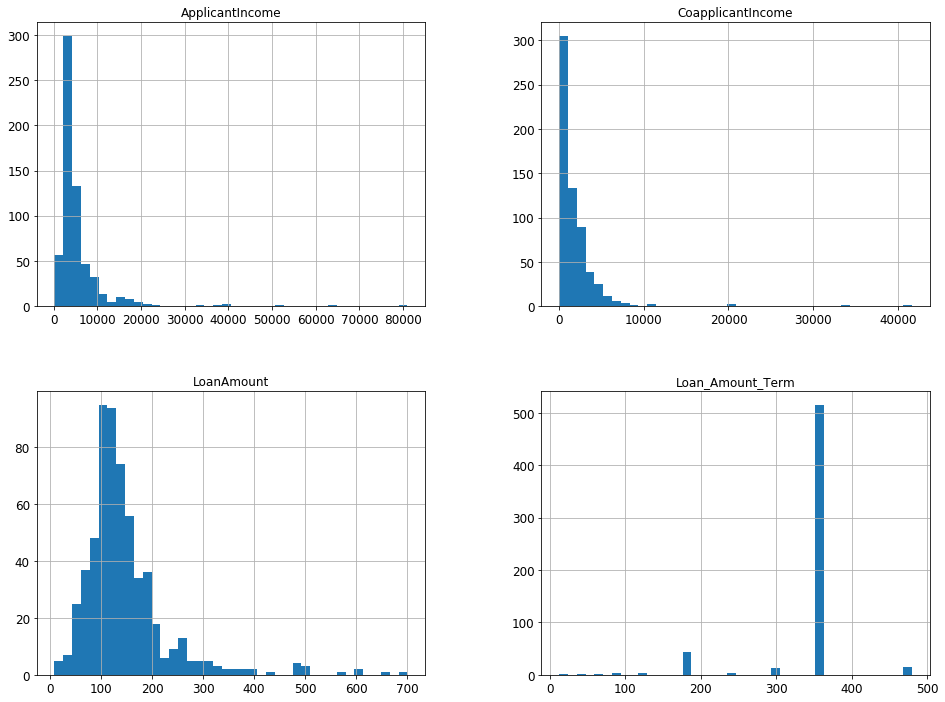

In [26]:
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term']].hist(figsize=(16, 12), bins=40, xlabelsize=12, ylabelsize=12);

In `ApplicantIncome` there are at least 3 cases above 50000. Likewise, in `CoapplicantIncome` there are 3 cases above 20000. There are two ways to go with it. 

1. Include these values as part of the model generation or 
2. remove them if you find that they are outlier. 

Let us analyze the `ApplicantIncome` data now.

### Once again let us see the stats of Application Income

In [27]:
loan_data['ApplicantIncome'].describe()

count      618.000000
mean      5397.320388
std       6093.626838
min        150.000000
25%       2877.500000
50%       3806.000000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

### Let us see the stats of Application Income at a particular percentile

In [28]:
APP_INCOME_THRESHOLD =  98.0

app_income_at_threshold = np.percentile(loan_data['ApplicantIncome'], APP_INCOME_THRESHOLD)
app_income_at_threshold

19646.359999999993

### Let us see the data that falls beyond the percentile limit

In [29]:
loan_data[loan_data['ApplicantIncome'] > app_income_at_threshold].sort_values(by='ApplicantIncome')

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
369,369,LP002191,Male,Yes,0.0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,19730,Graduate
130,130,LP001469,Male,No,0.0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,20166,Graduate
308,308,LP001996,Male,No,0.0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,20233,Graduate
284,284,LP001922,Male,Yes,0.0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N,20667,Graduate
506,506,LP002624,Male,Yes,0.0,Graduate,No,20833,6667.0,480.0,360.0,1.0,Urban,Y,20833,Graduate
126,126,LP001448,NaN,Yes,3.0,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,23803,Graduate
183,183,LP001637,Male,Yes,1.0,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,33846,Graduate
443,443,LP002422,Male,No,1.0,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,37719,Graduate
185,185,LP001640,Male,Yes,0.0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,39147,Graduate
155,155,LP001536,Male,Yes,3.0,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999,Graduate


### Let us see the size of the data that falls beyond the percentile limit

In [30]:
len(loan_data[loan_data['ApplicantIncome'] > app_income_at_threshold].sort_values(by='ApplicantIncome'))

13

There are 13 instances having `ApplicantIncome` more than the threshold. If you find it is OK to delete, you may delete them.

### If you want to delete the outliers from `ApplicantIncome` based on the threshold...

In [31]:
# loan_data = loan_data[loan_data.ApplicantIncome < app_income_at_threshold]

### Homework: Anayze the `CoapplicantIncome` feature and try to arrive at the outliers based on 99.3 percentile

In [32]:
<< your code goes here >>

SyntaxError: invalid syntax (<ipython-input-32-05e7c37e786c>, line 1)

### Homework: If you want to delete the outliers from `CoapplicantIncome` based on the threshold...

In [33]:
<< your code goes here >>

SyntaxError: invalid syntax (<ipython-input-33-05e7c37e786c>, line 1)

### *** Talk about ML Engineer/Data Engineer versus Data Scientist here ***

## <a id='new_feat'>6. Creation of New Features</a>

### Creation of new features require  good understanding of the data and domain knowledge!!

#### New features can be created from existing ones to generate better ML models.

#### In a bank, when we apply for a loan, the bank will consider the `Total Income` ( `Applicant and coapplicant Incomes`) of the applicant. So, let us create a new feature called `Total Income` by adding Applicant and coapplicant incomes.

### Create a new feature called `Total Income`

In [34]:
# Add ApplicantIncome and CoapplicantIncome. Store the resukt in TotalIncome
loan_data['TotalIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

### Print few rows of the dataframe

In [35]:
loan_data.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup,TotalIncome
0,0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849,Graduate,5849.0
1,1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583,Graduate,6091.0
2,2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000,Graduate,3000.0
3,3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583,Not Graduate,4941.0
4,4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000,Graduate,6000.0


### Draw the histogram of the new feature

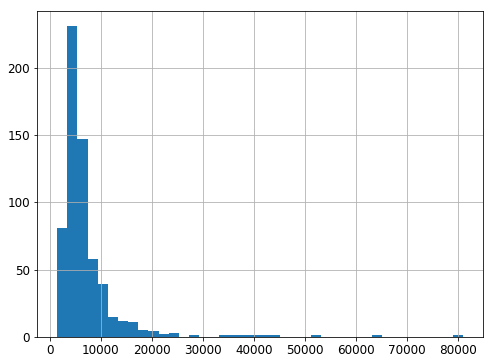

In [36]:
loan_data['TotalIncome'].hist(figsize=(8, 6), bins=40, xlabelsize=12, ylabelsize=12);

### Let us see the stats of Total Income at a particular percentile

In [38]:
TOT_INCOME_THRESHOLD = 98.5

total_income_at_threshold = np.percentile(loan_data['TotalIncome'], TOT_INCOME_THRESHOLD)
total_income_at_threshold

26861.48000000001

### Homework: Now we have a new feature called `Total Income`. 

### Let us print the stats of this feature using `describe()` command. Then compare the 'mean', 25%, 50%, and 75% values with that of `Applicant Income`

In [39]:
loan_data['TotalIncome'].describe()

count      618.000000
mean      7008.072686
std       6444.725700
min       1442.000000
25%       4161.500000
50%       5407.000000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64

### Let us delete the outlier that are beyond the threshold

In [40]:
loan_data = loan_data[loan_data.TotalIncome < total_income_at_threshold]

### Let us print the shape of the dataframe

In [41]:
loan_data.shape

(608, 17)

### Draw histogram for new feature

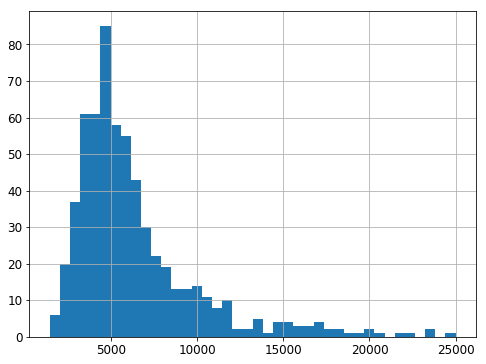

In [42]:
loan_data['TotalIncome'].hist(figsize=(8, 6), bins=40, xlabelsize=12, ylabelsize=12);

If you notice the above histogram, the distribution of data is `right-skewed`. But for a better machine learning model we want a data that is `Gaussian distributed` (aka `Normally distributed`). One way to make it Gaussian Distributed is to take a `log` of it. Let us take a log of it and see how they are distributed.

**REMEMBER: The bottom line is we have to arrive at a dataset that is `Normally distributed`.**

### Take a `log` of `TotalIncome` and print the histogram

In [43]:
# Take a log of the TotalIncome. 
loan_data['TotalIncome_log'] = np.log(loan_data['TotalIncome'])

### Draw histogram of `TotalIncome` and `TotalIncome_log`

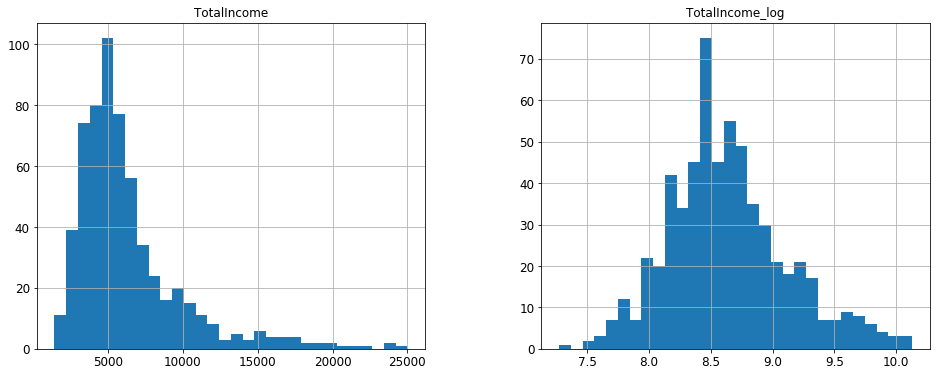

In [44]:
# Plot the graph now.
loan_data[['TotalIncome', 'TotalIncome_log']].hist(figsize=(16, 6), bins=30, xlabelsize=12, ylabelsize=12);

#### The `TotalIncome_log` plot looks like `Gaussian distributed`. This is the type of data that we want for machine learning model

### Time for some house-keeping work. *Now identify and delete the unnecessary features. Notedown what we did*

In [45]:
print(loan_data.columns)

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_dup', 'Education_dup', 'TotalIncome',
       'TotalIncome_log'],
      dtype='object')


In [46]:
loan_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [47]:
print(loan_data.columns)

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'ApplicantIncome_dup', 'Education_dup',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')


### Let us consider the feature `LoanAmount`

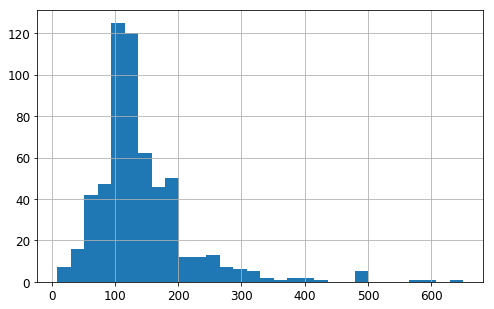

In [48]:
# Plot the graph for LoanAmount.
loan_data['LoanAmount'].hist(figsize=(8, 5), bins=30, xlabelsize=12, ylabelsize=12);

### Homework: If you look at the distribution of `LoanAmount` feature above, it is right-skewed. Can you remove the outliers?

#### Consider anything above 400 is an outlier

In [49]:
<< your code goes here >>

<< There are two ways to do that. One is to find out the THRESHOLD using np.percentile and removing it. >>
<< The second one is using the value 400 itself straightaway. Choose whatever the way your prefer.>>

SyntaxError: invalid syntax (<ipython-input-49-e0f22f3f6b4c>, line 1)

### Homework: Print a histogram after removing the outliers. Can you take a log of it and print the histogram again to see if it is better than the previous one?

In [50]:
<< your code goes here >>


SyntaxError: invalid syntax (<ipython-input-50-05e7c37e786c>, line 1)

### From the given dataset, let us create a new feature called `income_per_person`
#### `Income per person = Total Income / Total members in the family`

### Create a new feature called `family_count`

In [51]:
# Create a feature called 'family_count' by adding one to 'Dependents'. 
# NOTE: One is added to account the primary applicant holder
loan_data['family_count'] = loan_data['Dependents'] + 1

# Drop the Dependents feature
loan_data.drop(['Dependents'], axis=1, inplace=True)

### Create a new feature called `income_per_person`

In [53]:
# Create the feature `income_per_person` based on `family_count` and `TotalIncome`
loan_data['income_per_person'] = loan_data['TotalIncome'] / loan_data['family_count']

### Draw histogram of the feature ``Income per person`

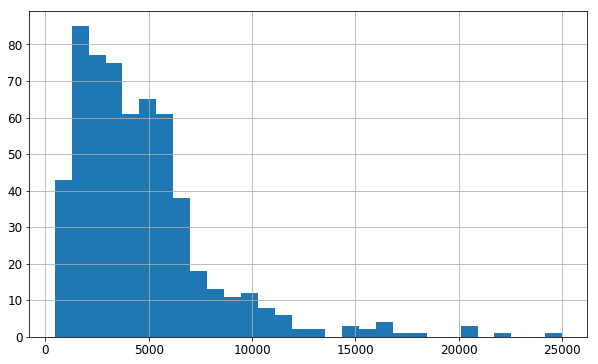

In [54]:
loan_data['income_per_person'].hist(figsize=(10, 6), bins=30, xlabelsize=12, ylabelsize=12);

### To have the feature `Income per person` normally distributed, take a `log` of it.

In [55]:
loan_data['income_per_person_log'] = np.log(loan_data['income_per_person'] )

# Drop the income_per_person feature
# loan_data.drop(['income_per_person'], axis=1, inplace=True)

### Draw a histogram for the feature `Income per person log`

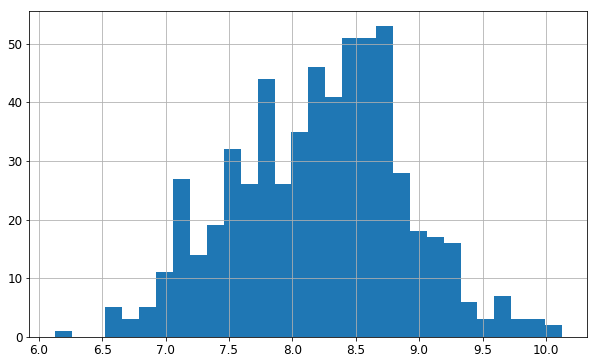

In [56]:
loan_data['income_per_person_log'].hist(figsize=(10, 6), bins=30, xlabelsize=12, ylabelsize=12);

In [57]:
loan_data.head()

,index,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup,TotalIncome,TotalIncome_log,family_count,income_per_person,income_per_person_log
0,0,LP001002,Male,No,Graduate,No,NaN,360.0,1.0,Urban,Y,5849,Graduate,5849.0,8.674026,1.0,5849.0,8.674026
1,1,LP001003,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,N,4583,Graduate,6091.0,8.714568,2.0,3045.5,8.021420
2,2,LP001005,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000,Graduate,3000.0,8.006368,1.0,3000.0,8.006368
3,3,LP001006,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y,2583,Not Graduate,4941.0,8.505323,1.0,4941.0,8.505323
4,4,LP001008,Male,No,Graduate,No,141.0,360.0,1.0,Urban,Y,6000,Graduate,6000.0,8.699515,1.0,6000.0,8.699515


In [58]:
loan_data.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'ApplicantIncome_dup', 'Education_dup', 'TotalIncome',
       'TotalIncome_log', 'family_count', 'income_per_person',
       'income_per_person_log'],
      dtype='object')

## Question: Can we create any more features based on the above columns?

### repayment_per_period = LoanAmount / Loan_Amount_Term
### repayment_ratio = ((TotalIncome * Loan_Amount_Term) / LoanAmount)
### loan_amount_per_person =  LoanAmount / family_count

### Remove the feature `TotalIncome` as it got conerted into `TotalIncome_log`

In [59]:
loan_data.drop(['TotalIncome'], axis=1, inplace=True)

### Save the data in a dataframe before proceeding further

In [60]:
loan_data.to_csv("LoanData_with_new_features.csv", index=False)

In [61]:
loan_data

,index,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup,TotalIncome_log,family_count,income_per_person,income_per_person_log
0,0,LP001002,Male,No,Graduate,No,NaN,360.0,1.0,Urban,Y,5849,Graduate,8.674026,1.0,5849.000000,8.674026
1,1,LP001003,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,N,4583,Graduate,8.714568,2.0,3045.500000,8.021420
2,2,LP001005,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000,Graduate,8.006368,1.0,3000.000000,8.006368
3,3,LP001006,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y,2583,Not Graduate,8.505323,1.0,4941.000000,8.505323
4,4,LP001008,Male,No,Graduate,No,141.0,360.0,1.0,Urban,Y,6000,Graduate,8.699515,1.0,6000.000000,8.699515
5,5,LP001011,Male,Yes,Graduate,Yes,267.0,360.0,1.0,Urban,Y,5417,Graduate,9.170872,3.0,3204.333333,8.072259
6,6,LP001013,Male,Yes,Not Graduate,No,95.0,360.0,1.0,Urban,Y,2333,Not Graduate,8.255569,1.0,3849.000000,8.255569
7,7,LP001014,Male,Yes,Graduate,No,158.0,360.0,0.0,Semiurban,N,3036,Graduate,8.619750,4.0,1385.000000,7.233455
8,8,LP001018,Male,Yes,Graduate,No,168.0,360.0,1.0,Urban,Y,4006,Graduate,8.618305,3.0,1844.000000,7.519692
9,9,LP001020,Male,Yes,Graduate,No,349.0,360.0,1.0,Semiurban,N,12841,Graduate,10.077819,2.0,11904.500000,9.384672


# ============================================================